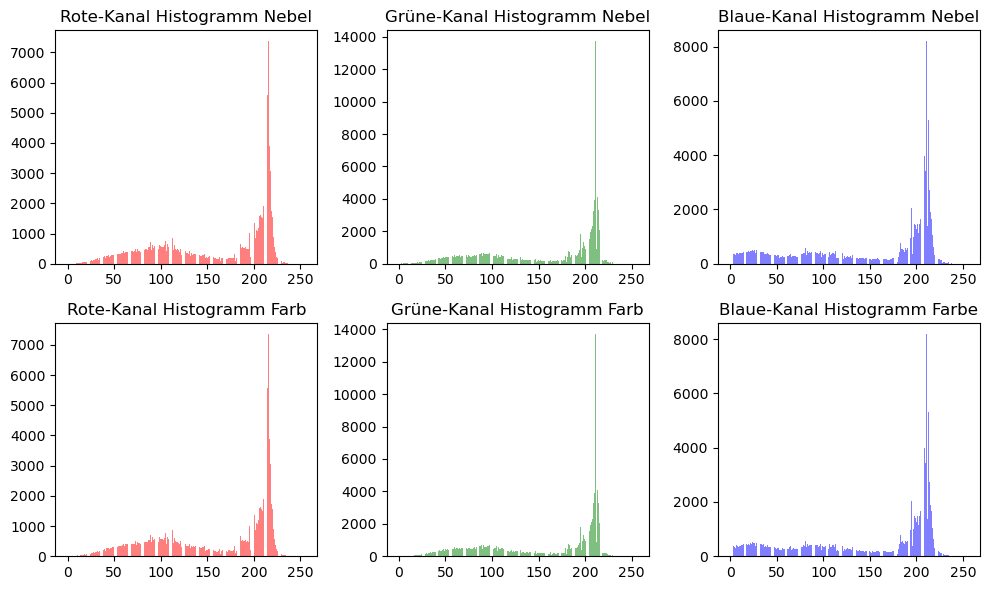

In [5]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

#1

nebel_image = skimage.io.imread("nebel.png")
farbverlaeufe_image = skimage.io.imread("farbverlaeufe.png")

nebel_hist_red, _ = np.histogram(nebel_image[:, :, 0], bins=256, range=[0, 256])
nebel_hist_green, _ = np.histogram(nebel_image[:, :, 1], bins=256, range=[0, 256])
nebel_hist_blue, _ = np.histogram(nebel_image[:, :, 2], bins=256, range=[0, 256])
farbverlaeufe_hist_red, _ = np.histogram(farbverlaeufe_image[:, :, 0], bins=256, range=[0, 256])
farbverlaeufe_hist_green, _ = np.histogram(farbverlaeufe_image[:, :, 1], bins=256, range=[0, 256])
farbverlaeufe_hist_blue, _ = np.histogram(farbverlaeufe_image[:, :, 2], bins=256, range=[0, 256])

plt.figure(figsize=(10, 6))
#---Rote-Kanal Histogramme
plt.subplot(2, 3, 1)
plt.bar(range(256), nebel_hist_red, color="red", alpha=0.5)
plt.title("Rote-Kanal Histogramm Nebel")
plt.subplot(2, 3, 4)
plt.bar(range(256), farbverlaeufe_hist_red, color="red", alpha=0.5)
plt.title("Rote-Kanal Histogramm Farb")

#---Grüne-Kanal Histogramme
plt.subplot(2, 3, 2)
plt.bar(range(256), nebel_hist_green, color="green", alpha=0.5)
plt.title("Grüne-Kanal Histogramm Nebel")
plt.subplot(2, 3, 5)
plt.bar(range(256), farbverlaeufe_hist_green, color="green", alpha=0.5)
plt.title("Grüne-Kanal Histogramm Farb")

#---Blaue-Kanal Histogramme
plt.subplot(2, 3, 3)
plt.bar(range(256), nebel_hist_blue, color="blue", alpha=0.5)
plt.title("Blaue-Kanal Histogramm Nebel")
plt.subplot(2, 3, 6)
plt.bar(range(256), farbverlaeufe_hist_blue, color="blue", alpha=0.5)
plt.title("Blaue-Kanal Histogramm Farbe")

plt.tight_layout()
plt.show()

In [12]:
#2
def calculate_3d_histogram(image):
    histogram = np.zeros((4, 4, 4), dtype=int)
    normalized_image = image // 64
    for pixel in normalized_image.reshape(-1, 3):
        histogram[pixel[0], pixel[1], pixel[2]] += 1
    return histogram

nebel_hist_3d = calculate_3d_histogram(nebel_image)
farbverlaeufe_hist_3d = calculate_3d_histogram(farbverlaeufe_image)

nebel_hist_3d
farbverlaeufe_hist_3d


array([[[    0,     0,     0,  1251],
        [    0,     0,     0,  2772],
        [    0,     0,     0,  1566],
        [    0,     0,     0,  5027]],

       [[    0,     0,     0,  3680],
        [    0,     0,     0,  8240],
        [    0,     0,     0,  4617],
        [    0,     0,     0, 15431]],

       [[    0,     0,   138,  1840],
        [    0,     0,   390,  4008],
        [    0,     0,   236,  2312],
        [    0,     0,   678,  7720]],

       [[ 2684,  2514,  1702,     0],
        [ 6018,  5541,  3741,     0],
        [ 3422,  3191,  2124,     0],
        [11446, 10669,  7042,     0]]])

In [7]:
#3
print("Histogramme für den Rote-Kanal:")
print("Nebel.png vs. Farbverlaeufe.png:", np.array_equal(nebel_hist_red, farbverlaeufe_hist_red))

print("Histogramme für den Grüne-Kanal:")
print("Nebel.png vs. Farbverlaeufe.png:", np.array_equal(nebel_hist_green, farbverlaeufe_hist_green))

print("Histogramme für den Blaue-Kanal:")
print("Nebel.png vs. Farbverlaeufe.png:", np.array_equal(nebel_hist_blue, farbverlaeufe_hist_blue))

print("3D Histogramme:")
print("Nebel.png vs. Farbverlaeufe.png:", np.array_equal(nebel_hist_3d, farbverlaeufe_hist_3d))


Histogramme für den Rote-Kanal:
Nebel.png vs. Farbverlaeufe.png: True
Histogramme für den Grüne-Kanal:
Nebel.png vs. Farbverlaeufe.png: True
Histogramme für den Blaue-Kanal:
Nebel.png vs. Farbverlaeufe.png: True
3D Histogramme:
Nebel.png vs. Farbverlaeufe.png: False


In [9]:
#4

nebel_index = np.unravel_index(np.argmax(nebel_hist_3d), nebel_hist_3d.shape)
farbverlaeufe_d_index = np.unravel_index(np.argmax(farbverlaeufe_hist_3d), farbverlaeufe_hist_3d.shape)


nebel_d_color = np.array(nebel_index) * 64 + 32
farbverlaeufe_d_color = np.array(farbverlaeufe_d_index) * 64 + 32

print("Dominanter Farbbereich von nebel.png:", nebel_d_color)
print("Dominanter Farbbereich von farbverlaeufe.png:", farbverlaeufe_d_color)


Dominanter Farbbereich von nebel.png: [224 224 224]
Dominanter Farbbereich von farbverlaeufe.png: [ 96 224 224]
